In [270]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris, load_boston
# Importing all the neccessary libraries

import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
#import plotly  #  interactive plotting library 

sns.set(color_codes=True)

# For data processing
import pandas as pd
import numpy as np
import math
#from statsmodels.stats.weightstats import ztest
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
pd.options.mode.chained_assignment = None

# For data vis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go 


# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [271]:
# Loading the dataset into the pandas dataframe (cleaned dataset)

df = pd.read_csv('data_cleaned_2020.csv',sep = r',')
#df.columns = df.columns.str.strip(' ') 

df.head(2)

,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,scikit_yn,tensor_yn,weka_yn,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Noom US,NY,13,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,ssr,ssr,2350,367


In [272]:
# Lets look at the shape of the dataset

print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 6160
No. of columns in the dataset: 62


In [274]:
# Scanning the dataset for missing values.

df.isnull().sum()

Job_Title                   0
Salary_Estimate             0
Job Description             0
Rating                      0
Company_Name                0
                           ..
seniority_by_title          0
seniority_by_description    0
seniority                   0
desc_len                    0
desc_len_words              0
Length: 62, dtype: int64

In [275]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job_Title                 6160 non-null   object 
 1   Salary_Estimate           6160 non-null   object 
 2   Job Description           6160 non-null   object 
 3   Rating                    6160 non-null   float64
 4   Company_Name              6160 non-null   object 
 5   Location                  6160 non-null   object 
 6   Headquarters              6160 non-null   object 
 7   Size                      6160 non-null   object 
 8   Founded                   6160 non-null   int64  
 9   Type_of_ownership         6160 non-null   object 
 10  Industry                  6160 non-null   object 
 11  Sector                    6160 non-null   object 
 12  Revenue                   6160 non-null   object 
 13  Competitors               6160 non-null   object 
 14  Easy App

In [276]:
# Provide a summary of the numerical information...

df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,sql_yn,sas_yn,d3js_yn,julia_yn,jupyter_yn,keras_yn,matlab_yn,matplotlib_yn,pytorch_yn,scikit_yn,tensor_yn,weka_yn,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,desc_len,desc_len_words
count,6160.000000,6160.000000,6160.000000,6160.0,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.0,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000,6160.000000
mean,3.238425,1449.496429,0.003409,0.0,71.874351,117.905844,94.890097,33.897890,0.493994,0.194318,0.160065,0.198701,0.520617,0.553571,0.100487,0.013799,0.003734,0.019805,0.019805,0.035877,0.009578,0.022078,0.030519,0.049026,0.001623,0.001948,0.125649,0.209903,0.086688,0.0,0.001299,0.006331,0.003084,0.006494,0.028734,0.000649,0.003571,0.051461,0.011526,0.020779,0.047727,3409.427760,486.761688
std,1.610190,873.795119,0.058293,0.0,32.552516,45.084477,37.934358,48.585263,0.500005,0.395707,0.366696,0.399055,0.499615,0.497162,0.300673,0.116664,0.060995,0.139342,0.139342,0.185998,0.097405,0.146949,0.172026,0.215940,0.040262,0.044097,0.331481,0.407272,0.281401,0.0,0.036017,0.079323,0.055456,0.080327,0.167071,0.025476,0.059659,0.220954,0.106747,0.142656,0.213206,1972.364047,281.762235
min,-1.000000,-1.000000,0.000000,0.0,12.000000,38.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000
25%,3.200000,-1.000000,0.000000,0.0,46.000000,83.000000,64.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,281.000000
50%,3.700000,1976.000000,0.000000,0.0,64.000000,110.000000,85.500000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3157.000000,449.000000
75%,4.100000,2002.000000,0.000000,0.0,94.000000,149.000000,122.000000,41.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4449.250000,639.250000
max,5.000000,2020.000000,1.000000,0.0,200.000000,254.000000,225.000000,396.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19895.000000,3041.000000


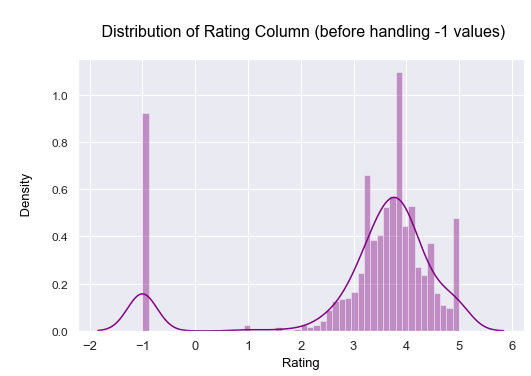

In [277]:
# Lets look at how the 'Rating' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.Rating,color="purple")
plt.show()

In [278]:
# Replacing the -1 values in 'Rating' column with nan value.

df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==-1 else x)

# Fill missing values with the mean of the distribution.

df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

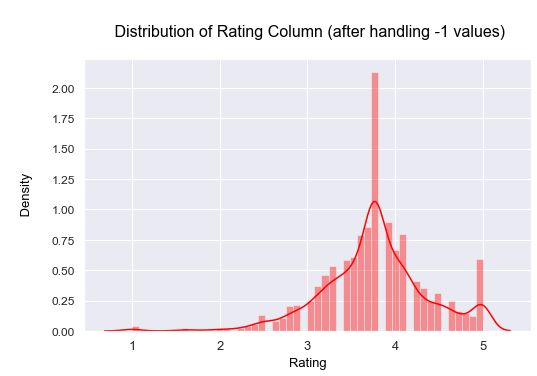

In [279]:
# Verifying that the replace function worked properly for the 'Rating' column.

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (after handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["Rating"],kde=True,color="red")
plt.show()

<Figure size 576x360 with 0 Axes>

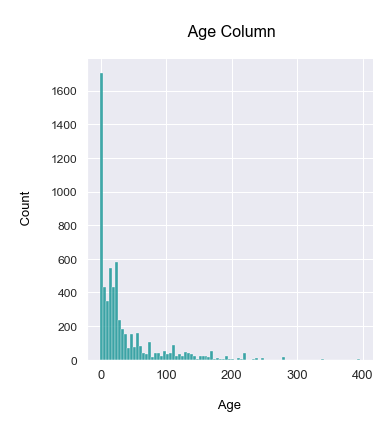

In [280]:
# Looking at the 'Age' column.

plt.figure(figsize=(8,5))
a = sns.displot(df.age,color="darkcyan")
plt.title('\n Age Column\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

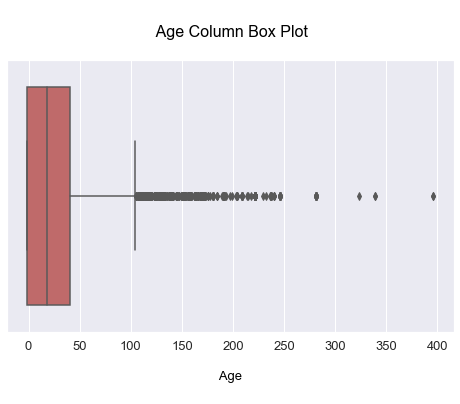

In [281]:
# To see any outliers in the 'Age' column.

plt.figure(figsize=(8,5))
sns.boxplot(df.age,color="indianred")
plt.title('\n Age Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

# Visualization of jobs in different states of U.S.
The dataset doesn't have Longitude and Latitude information required for visualizations on a US map. So, I am adding a Long, Lat US dataset into the main dataframe. Source: https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations

In [282]:
# Importing the dataset and dropping columns that is not needed.
#I changed a column name from "State" to "Job Location" because this will help me in merging the two dataframes together.
df2 = pd.read_csv("statelatlong.csv").rename(columns={"State":"Job_Location"})
df2.columns = df2.columns.str.strip()
#Dropping the \column that is not required.
df2 = df2.drop("City",axis=1)
#Looking at first few records.
df2.head(5)



,Job_Location,Latitude,Longitude
0,AL,32.601011,-86.680736
1,AK,61.302501,-158.775020
2,AZ,34.168219,-111.930907
3,AR,34.751928,-92.131378
4,CA,37.271875,-119.270415


In [283]:
print(df.columns.tolist())

['Job_Title', 'Salary_Estimate', 'Job Description', 'Rating', 'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn', 'sas_yn', 'd3js_yn', 'julia_yn', 'jupyter_yn', 'keras_yn', 'matlab_yn', 'matplotlib_yn', 'pytorch_yn', 'scikit_yn', 'tensor_yn', 'weka_yn', 'selenium_yn', 'hadoop_yn', 'tableau_yn', 'bi_yn', 'bigml_yn', 'rapidminer_yn', 'flink_yn', 'datarobot_yn', 'hana_yn', 'mongo_yn', 'trifacta_yn', 'minitab_yn', 'kafka_yn', 'microstrategy_yn', 'google_an_yn', 'spss_yn', 'job_simp', 'seniority_by_title', 'seniority_by_description', 'seniority', 'desc_len', 'desc_len_words']


In [284]:
#Merging the two datasets based on "Job Location" column.
#df = df.merge (df2, how = "right", right_on = 'right_on')
df = df.join(df2, lsuffix= "Job_Location" )
df


,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words,Job_Location,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.500000,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526,AL,32.601011,-86.680736
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.500000,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Noom US,NY,13,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,ssr,ssr,2350,367,AK,61.302501,-158.775020
2,Data Science Manager,$111K-$181K (Glassdoor est.),decode_m https://www.decode-m.com/ data scie...,3.765231,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Other Organization,-1,-1,Unknown / Non-Applicable,-1,True,0,0,111,181,146.0,Decode_,NY,-1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,ssr,ssr,3157,502,AZ,34.168219,-111.930907
3,Data Analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.400000,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,0,0,111,181,146.0,Sapphire Digital,NJ,2,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,analyst,na,ssr,ssr,2619,369,AR,34.751928,-92.131378
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"director, data science - (200537) description ...",3.400000,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,0,0,111,181,146.0,United Entertainment Group,NY,14,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na,na,2755,405,CA,37.271875,-119.270415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),maintains systems to protect data from unautho...,2.500000,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,0,0,78,104,91.0,"Avacend, Inc.",CO,-1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,analyst,na,na,na,497,75,NaN,NaN,NaN
6156,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),position: senior data analyst (corporate audit...,2.900000,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,0,0,78,104,91.0,Arrow Electronics,CO,86,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,analyst,sr,ssr,sr,4214,579,NaN,NaN,NaN
6157,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"title: technical business analyst (sql, data a...",3.765231,Spiceorb,"Denver, CO",-1,na,-1,Other Organization,-1,-1,Unknown / Non-Applicable,-1,-1,0,0,78,104,91.0,Spiceor,CO,-1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,analyst,na,jr,jr,237

In [234]:
df.head(2)

,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words,Job_Location,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526,AL,32.601011,-86.680736
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Noom US,NY,13,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,ssr,ssr,2350,367,AK,61.302501,-158.775020


In [235]:
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 6160
No. of columns in the dataset: 65


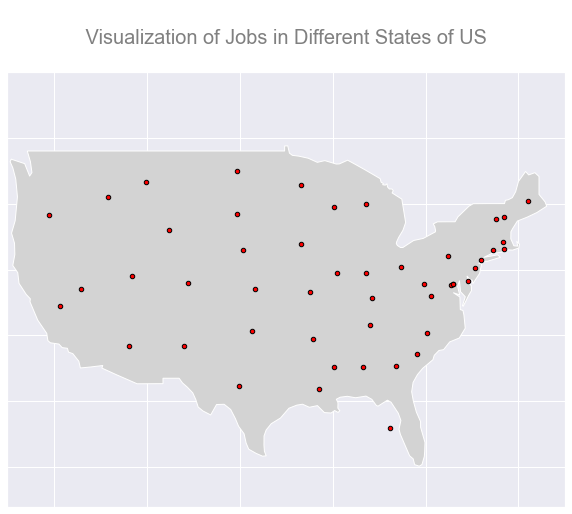

In [285]:
import geopandas as gpd
#Geopandas lets you load the geometry for countries worldwide into an object called GeoDataFrame.
fig, ax = plt.subplots(figsize=(10,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
# Since our focus is on US, we can slice the “countries” object so it shows us US only:
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)
#Now we put points on it.
df.plot(x="Longitude", y="Latitude", kind="scatter",c="red",edgecolor="black", ax=ax)
plt.xlabel("")
plt.ylabel("")
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
plt.title('\n Visualization of Jobs in Different States of US \n', size=20, color='grey');
plt.show()

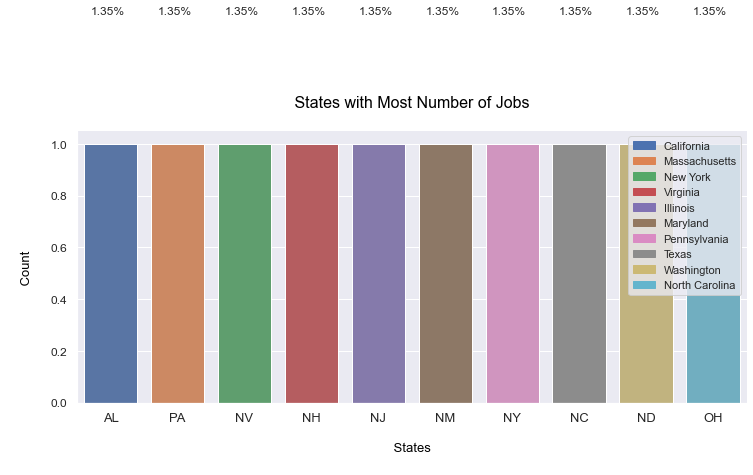

In [286]:
#Adding labels for the states
lab=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

from IPython.core.pylabtools import figsize
#Lets look at the top 10 states with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df["Job_Location"].value_counts().index[0:10], y = df["Job_Location"].value_counts()[0:10])

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = df["Job_Location"].value_counts().index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/742)*1000))

#Beautifying the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,100),lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()

In [240]:
sorter = df["Job_Location"].value_counts().index
sorter

Index(['AL', 'PA', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
       'RI', 'MT', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',
       'NE', 'MO', 'AK', 'ID', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'IL', 'MS', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'WY'],
      dtype='object')

In [287]:
df.head(1)

,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words,Job_Location,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526,AL,32.601011,-86.680736


In [289]:
# prepare data frame
df_gr = df.iloc[:10,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
    x = df["Rating"],
    y = df["max_salary"],
    name = "max_salary",
    mode = "lines",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    text = df["Job_Title"]
)

trace2 = go.Scatter(
    x = df["Rating"],
    y = df["min_salary"],
    name = "min_salary",
    mode = "lines+markers",
    marker = dict(color = "rgba(80, 26, 80, 0.8)"),
    text = df["Job_Title"]
)

data = [trace1, trace2] #lista
layout = dict(title = "Salario min y max vs Raiting ",
xaxis = dict(title="Rating", ticklen = 5))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [291]:
# prepare data frame
df__ = df.iloc[:10,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
    x = df["Location"],
    y = df["max_salary"],
    name = "max_salary",
    mode = "lines",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    text = df["Job_Title"]
)

data = [trace1] #lista
layout = dict(title = "Salario max ",
xaxis = dict(title="Job_Title", ticklen = 10))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [292]:
df.head(2)

,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words,Job_Location,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526,AL,32.601011,-86.680736
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Noom US,NY,13,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,ssr,ssr,2350,367,AK,61.302501,-158.775020


In [301]:
df[""].unique()

array(['Travel Agencies', 'Health, Beauty, & Fitness', '-1', 'Internet',
       'Advertising & Marketing', 'Insurance Carriers',
       'Investment Banking & Asset Management',
       'Enterprise Software & Network Solutions', 'Other Retail Stores',
       'Consulting', 'Research & Development',
       'Motion Picture Production & Distribution', 'Brokerage Services',
       'IT Services', 'Computer Hardware & Software', 'Security Services',
       'Casual Restaurants', 'Food & Beverage Stores', 'Food Production',
       'Health Fundraising Organizations',
       'Home Furniture & Housewares Stores',
       'Financial Analytics & Research', 'Education Training Services',
       'Lending', 'Social Assistance', 'Publishing', 'Federal Agencies',
       'Health Care Services & Hospitals',
       'Oil & Gas Exploration & Production', 'Staffing & Outsourcing',
       'Venture Capital & Private Equity',
       'Building & Personnel Services', 'Video Games', 'Accounting',
       'Consumer Produ

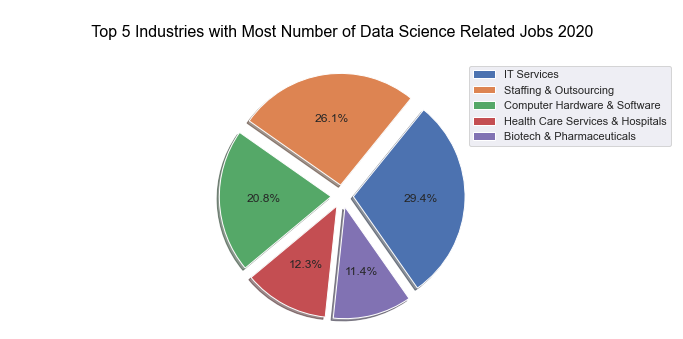

In [305]:
#Plotting pie chart

my_explode=(0.1,0.1,0.1,0.1,0.1)
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[1:6].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 Industries with Most Number of Data Science Related Jobs 2020 \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [406]:
# To show all the records
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

pd.pivot_table(df, index = ['Job_Location','job_simp'], values = 'avg_salary').sort_values('Job_Location', ascending = False)

,,avg_salary
Job_Location,job_simp,
WY,analyst,130.0
WV,analyst,130.0
WI,data scientist,130.0
WA,data scientist,130.0
VT,data scientist,130.0
VA,data scientist,130.0
UT,data scientist,130.0
TX,data scientist,130.0
TN,na,130.0


In [313]:
sort_ind = df["Industry"].value_counts().sort_values(ascending=False).index

In [315]:
#Making a DF and sortring it w.r.t. sort_ind

ind = df.groupby("Industry")["min_salary","max_salary"].mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind = ind.drop("index",axis=1)
ind.head(3)

,Industry,min_salary,max_salary
0,-1,69.324805,114.283648
1,IT Services,68.761606,113.567127
2,Staffing & Outsourcing,65.617323,107.719685


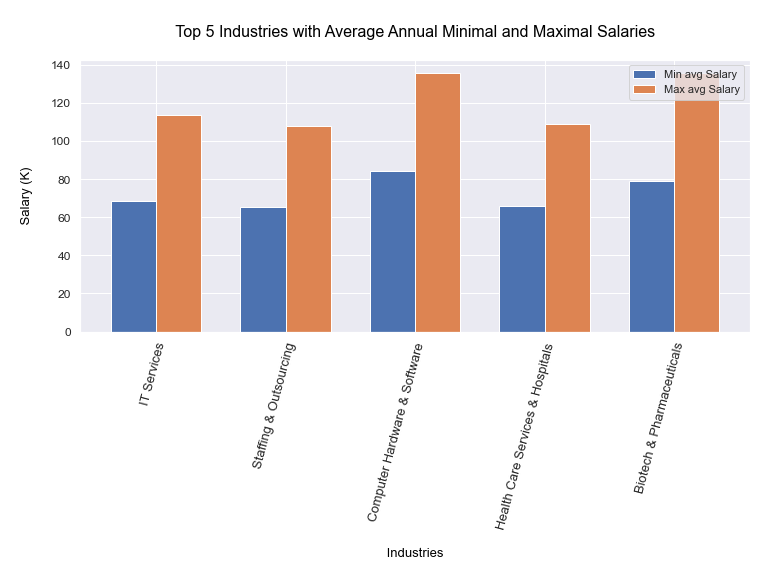

In [318]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[1:6]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["min_salary"][1:6], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["max_salary"][1:6], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

In [400]:
num_emp = df["job_simp"].value_counts().sort_values(ascending=False).index

In [402]:
#Making a DF and sortring it w.r.t. sort_ind

ind = df.groupby("job_simp")["min_salary","max_salary"].mean().sort_values("job_simp",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["job_simp"] = ind["job_simp"].astype("category")
ind["job_simp"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["job_simp"]).reset_index()
ind = ind.drop("index",axis=1)
ind.head(3)

,job_simp,min_salary,max_salary
0,NaN,74.810773,129.295580
1,NaN,80.188034,128.863248
2,NaN,81.661017,131.881356


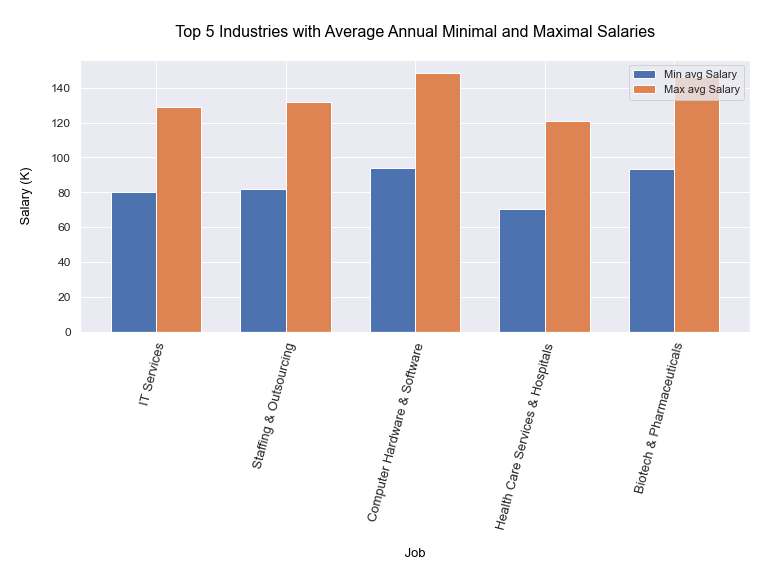

In [407]:
#Trabajo y lo mejores padgados
#  Drawing the grouped bar plot.

lab=[]
for i in sort_ind[1:6]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["min_salary"][1:6], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["max_salary"][1:6], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Job \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

In [323]:
df.head(1)

,Job_Title,Salary_Estimate,Job Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy Apply,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,...,selenium_yn,hadoop_yn,tableau_yn,bi_yn,bigml_yn,rapidminer_yn,flink_yn,datarobot_yn,hana_yn,mongo_yn,trifacta_yn,minitab_yn,kafka_yn,microstrategy_yn,google_an_yn,spss_yn,job_simp,seniority_by_title,seniority_by_description,seniority,desc_len,desc_len_words,Job_Location,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, we’re on a mission to...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,0,0,111,181,146.0,Hopper,NY,14,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,sr,na,sr,3417,526,AL,32.601011,-86.680736


In [399]:
#Drawing a pivot table.
pd.pivot_table(df,index=["job_simp","seniority_by_title"],values="avg_salary")

avg_salary
job_simp                  seniority_by_title            
analyst                   jr                   73.826733
                          na                   80.767422
                          sr                   80.299672
                          ssr                  79.150000
data analitics            na                   92.403846
                          sr                   90.444444
data engineer             jr                  105.428571
                          na                   99.711966
                          sr                  101.899390
                          ssr                  95.750000
data modeler              na                   97.316667
                          sr                   86.500000
data scientist            jr                  104.500000
                          na                  118.372430
                          sr                  123.390884
                          ssr                  61.750000
director                  na                   89.909091
                          sr                  115.666667
machine learning engineer na                  125.954955
                          sr                  100.041667
manager                   na                  105.750000
                          sr                  114.357143
na                        na                  103.838542
                          sr                  107.666667
other scientist           jr                   98.500000
                          na                  100.268519
                          sr                  108.164773
                          ssr                  77.625000

In [394]:
salary=["avg_salary"]


In [395]:
df.groupby('job_simp')[salary].mean().sort_values("avg_salary",ascending=False)

,avg_salary
job_simp,
machine learning engineer,121.348148
data scientist,119.738712
manager,106.771186
na,104.525641
other scientist,102.053177
data engineer,100.227573
director,95.428571
data modeler,95.270270
data analitics,92.114754


In [369]:
#Data scientist
ds = df[df["job_simp"]=="data scientist"].groupby("Job_Location")[salary].mean().sort_values("avg_salary",ascending=False)[0:10]




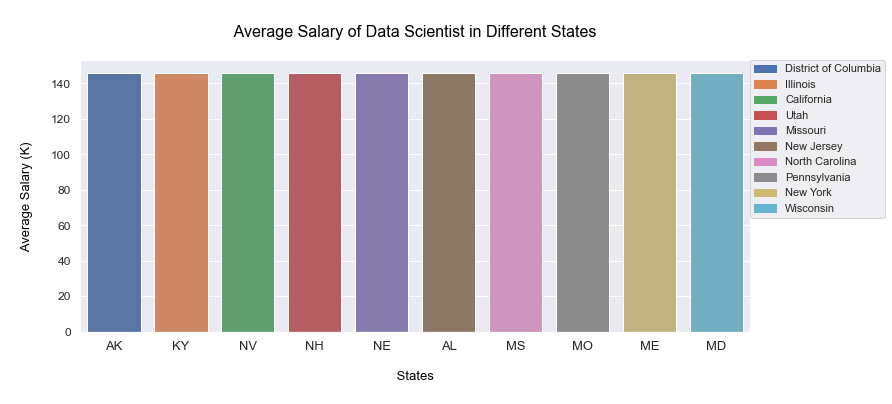

In [385]:
lab=["District of Columbia","Illinois","California","Utah","Missouri","New Jersey","North Carolina","Pennsylvania","New York","Wisconsin"]

#Plot for Data Scientist

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= ds.index, y = ds["avg_salary"])

# figure size in inches
rcParams['figure.figsize'] = 12,5

#Beautifying the plot
plt.title('\n Average Salary of Data Scientist in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')

patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) 
        for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

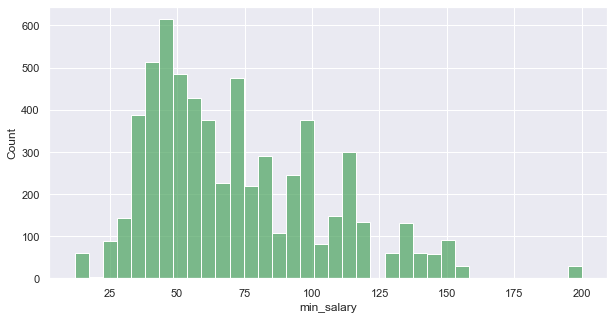

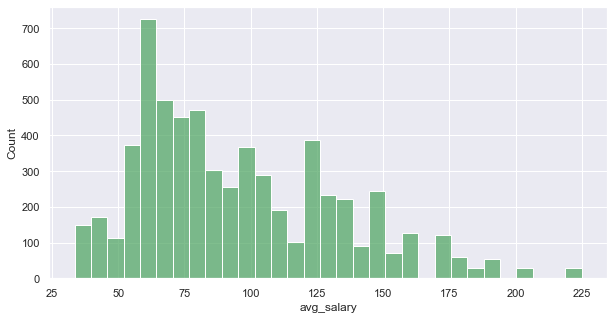

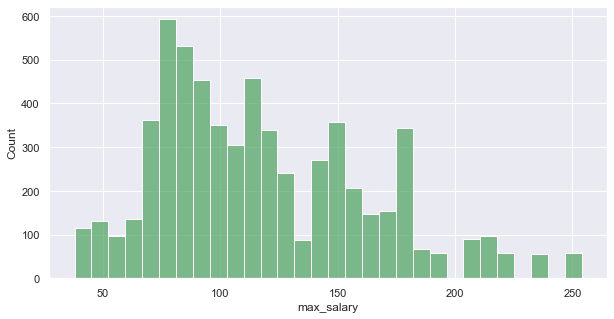

In [347]:
plt.figure(figsize=(10,5))
sns.histplot(df["min_salary"],
kde=False,
color = "g");

plt.figure(figsize=(10,5))
sns.histplot(df["avg_salary"],
kde=False,
color = "g");

plt.figure(figsize=(10,5))
sns.histplot(df["max_salary"],
kde=False,
color = "g");

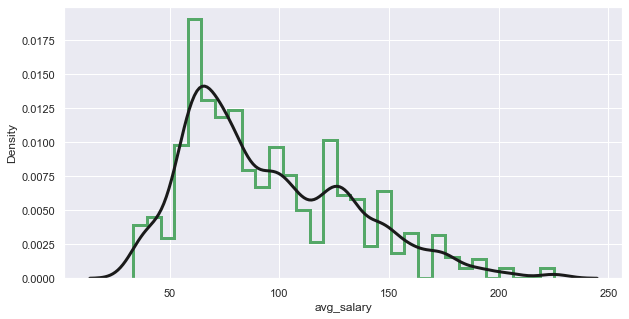

In [348]:
plt.figure(figsize=(10,5))
sns.distplot(df["avg_salary"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

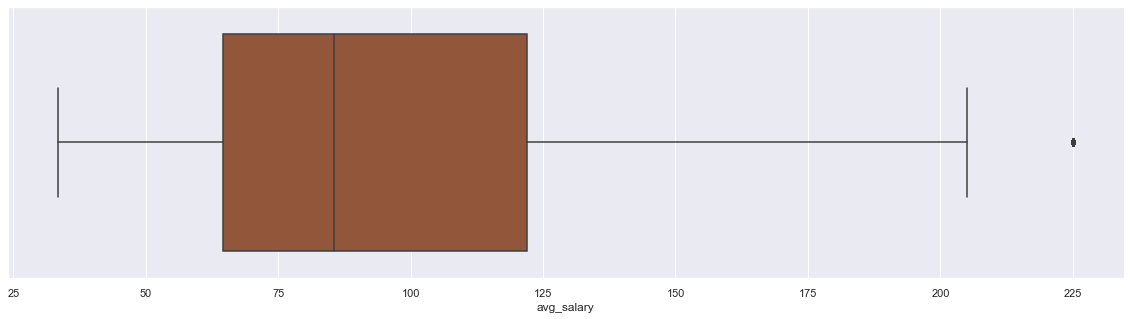

In [349]:
plt.figure(figsize=(20,5))
sns.boxplot(df["avg_salary"], color="sienna");

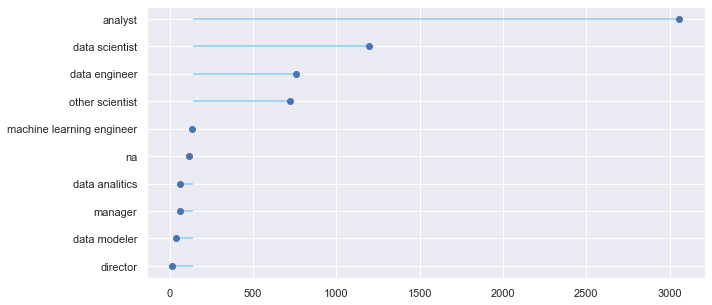

In [364]:

conteo = df['job_simp'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


In [361]:
pd.unique(df['job_simp'])

array(['data scientist', 'analyst', 'na', 'other scientist',
       'data engineer', 'manager', 'machine learning engineer',
       'director', 'data modeler', 'data analitics'], dtype=object)

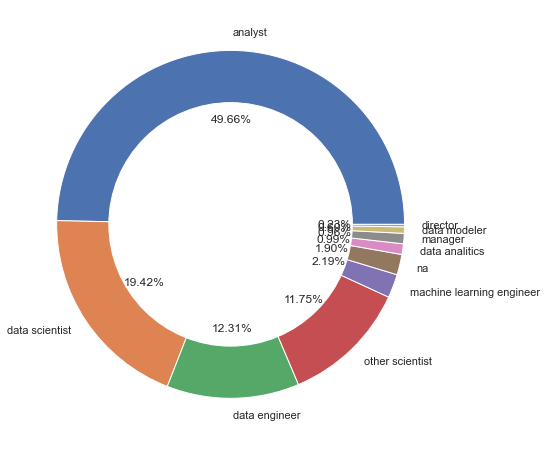

In [365]:
import matplotlib.pyplot as plt
 
# create data
data = df["job_simp"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()